# <p style="background-color:skyblue; font-family:Berlin Sans FB Demi; color:black; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project| Mumbai Rainfall Forecasting Prediction </p>

![Rainfall Forecast](https://s3.india.com/wp-content/uploads/2021/07/Heavy-Rain-In-mumbai.jpg)

<div style="border-radius:10px; padding: 15px; background-color: green; font-size:115%; text-align:left">

<h3 align="center"><font color=white>| Problem Statement |</font></h3>

***a. Trend Analysis:***
- **Identify Trends:** Analyze long-term trends in rainfall (increasing, decreasing, or stable) over the decades.
- **Seasonality:** Determine if there are specific months with higher or lower rainfall and identify seasonal patterns.

***b. Anomaly Detection:***
- **Extreme Events:** Identify years with unusually high or low rainfall, which could be indicative of climate change or extreme weather patterns.
- **Impact Analysis:** Assess how these anomalies correlate with other climatic factors or urban development in Mumbai.

***c. Forecasting:***
- **Predict Future Rainfall:** Utilize historical data to develop predictive models that forecast future rainfall patterns. This could involve time series forecasting techniques or machine learning models.
- **Assess Accuracy:** Measure the accuracy of the forecast models using historical data.

In [516]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

<div style="background-color: #2E2222; padding: 25px; border-radius:50px 50px; width:90%;">
    <p style="background-color:#6b5c5c; font-family:Book Antiqua; color:white; font-size:230%; text-align:center; border-radius:0px 0px;">• | Table Of Contents|•</p>

## Data Exploration
- **Basic statistics summary of the data**
- **Find Missing Value**
- **Correlation Matrix**

## Rainfall Data Visualization
- **Visualizing Rainfall in Mumbai**
  - Total Rainfall
  - Monthly Rainfall
  - Histplot Distribution of Total Yearly Rainfall

## 3. Outliers Handling
- **Removing Outliers Using IQR (Interquartile Range) Method**
- **Capping Outliers**
- **Z-Score or Standard Deviation Method**

## Rainfall Classification
- **Classification of Yearly Rainfall Data**
  - Distribution of Rainfall Categories
  - Joint Distribution of Rainfall Category
- **Mapping for Classification & Category Column**

## Preprocessing
- **Data Splitting**
- **Feature Scaling**

## Machine Learning Models
- **6.1 Decision Tree Regressor**
- **6.2 Random Forest Regressor**
- **6.3 Gradient Boost Regressor**
- **6.4 XGBoost Regression**

## 7. Model Performance
- **7.2 Display the MAE and R² Score for All Models**
- **7.3 Visualize The Model Comparison**
- **7.4 Comparison of the MAE and R² Scores for All Models**

In [517]:
# Load the data

rain = pd.read_csv('D:\BIA\Capstone Project\Rain Forecasting\mumbai-monthly-rains.csv')

# Display the first few rows of the dataset
rain.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [518]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [519]:
rain.shape

(121, 14)

# Basic statistics summary of the data

In [520]:
rain.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,1961.000000,35.073732,1901.000000,1931.000000,1961.000000,1991.000000,2021.000000
Jan,121.0,1.567235,6.462247,0.000000,0.000000,0.000000,0.000000,51.348290
Feb,121.0,0.929358,3.077050,0.000000,0.000000,0.000000,0.152298,21.107118
Mar,121.0,0.869231,2.890032,0.000000,0.000000,0.000000,0.000000,18.252996
April,121.0,1.428458,7.371307,0.000000,0.000000,0.000000,0.194165,75.541818
May,121.0,18.183632,48.628812,0.000000,0.000000,0.355001,4.208322,234.392757
June,121.0,517.854402,251.067016,61.058662,324.094617,482.449872,678.040770,1219.518576
July,121.0,757.407412,285.836188,103.209194,540.745923,788.403637,942.616099,1358.833554
Aug,121.0,465.600818,249.072915,87.493370,268.002392,445.870342,604.372615,1200.956558
Sept,121.0,312.885747,205.135368,36.313545,149.584208,269.276549,398.645218,987.796660


# Find Missing Value 

In [521]:
rain.isnull()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [522]:
rain.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

In [523]:
rain.nunique()

Year     121
Jan       31
Feb       30
Mar       28
April     34
May       67
June     121
July     121
Aug      121
Sept     121
Oct      114
Nov       72
Dec       33
Total    121
dtype: int64

In [524]:
# Calculate annual averages and other statistics
annual_avg = rain['Total'].mean()
annual_max = rain['Total'].max()
annual_min = rain['Total'].min()

print(f"Annual Average Rainfall: {annual_avg:.2f} mm")
print(f"Maximum Annual Rainfall: {annual_max:.2f} mm")
print(f"Minimum Annual Rainfall: {annual_min:.2f} mm")

Annual Average Rainfall: 2168.12 mm
Maximum Annual Rainfall: 3563.26 mm
Minimum Annual Rainfall: 1058.84 mm


# Correlation Matrix

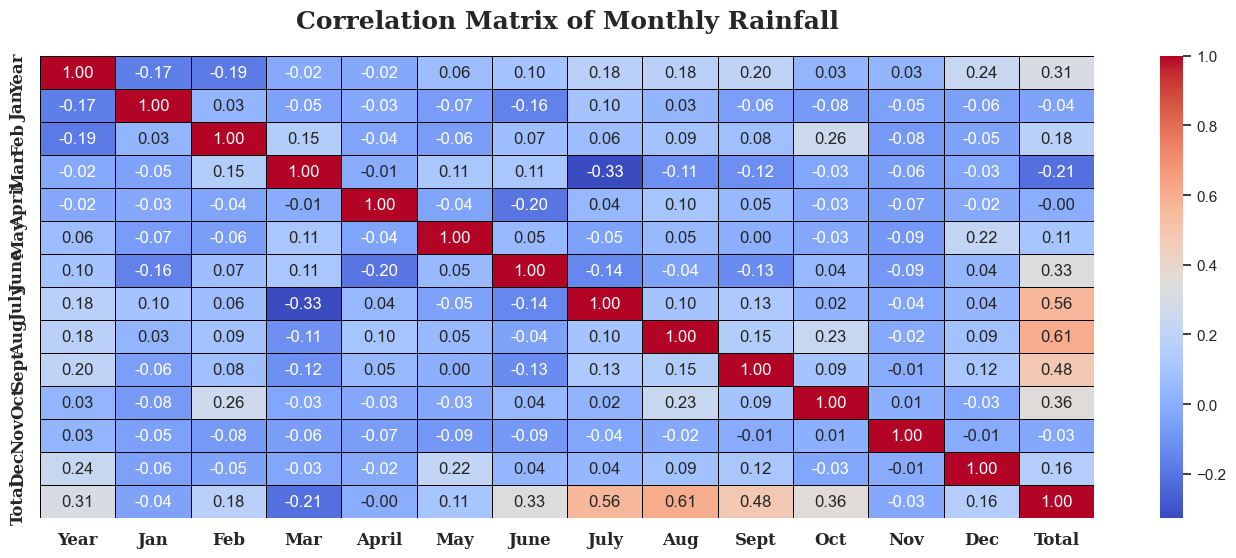

In [525]:
plt.figure(figsize=(17,6))
correlation_matrix = rain.corr()

# Heatmap for correlation between features
sns.heatmap(rain.corr(),annot = True,fmt=".2f",linewidths=0.5,linecolor='black',cmap='coolwarm')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Correlation Matrix of Monthly Rainfall',fontsize=18, fontweight='bold', fontfamily='serif', pad=20)
plt.show()

# **|Summary :-**
- **The correlation matrix of monthly rainfall shows that the monsoon months (July, August, September) are strongly correlated with each other and with total annual rainfall, indicating their significant impact on overall rainfall patterns.**
- **Non-monsoon months have weaker or negative correlations, highlighting their limited contribution to total rainfall and lack of dependence on each other.**
- **This seasonal correlation pattern is key for planning water resource management.**

# Visualizing Rainfall in Mumbai

# | Total Rainfall

In [526]:
rain.groupby("Year").sum()['Total'];
fig = px.line(rain, x='Year', y='Total', 
              title='Total Rainfall in Mumbai (1901-2021)',
              labels={'Total': 'Total Rainfall (mm)', 'Year': 'Year'},
              markers=True)

# Show the plot
fig.show()

# **|Summary :-**
- You will be able to see trends and fluctuations in Mumbai’s total annual rainfall over time.
- Peaks in the line indicate years with unusually high rainfall, while troughs represent years with significantly less rainfall.
- This visualization is useful for identifying periods of high variability (e.g., years with extreme rainfall or drought conditions) and potential long-term trends (e.g., any noticeable increase or decrease in average annual rainfall over time).
- This plot provides a clear, visual representation of how rainfall in Mumbai has changed over more than a century, offering valuable insights into long-term climate patterns.

# | Monthly Rainfall

In [527]:
# Group by Year and sum the monthly rainfall
monthly_rainfall = rain[['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 
                                   'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']].groupby("Year").sum().reset_index()

# Melt the DataFrame for better plotting
monthly_rainfall_melted = monthly_rainfall.melt(id_vars='Year', 
                                                 value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 
                                                             'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                                                 var_name='Month', value_name='Rainfall (mm)')

# Create the Plotly Express plot
fig = px.line(monthly_rainfall_melted, x='Year', y='Rainfall (mm)', color='Month',
              title='Monthly Rainfall in Mumbai (Yearly)',
              labels={'Rainfall (mm)': 'Total Monthly Rainfall (mm)', 'Year': 'Year'})

# Show the plot
fig.show()

# | Histplot Distribution of Total Yearly Rainfall

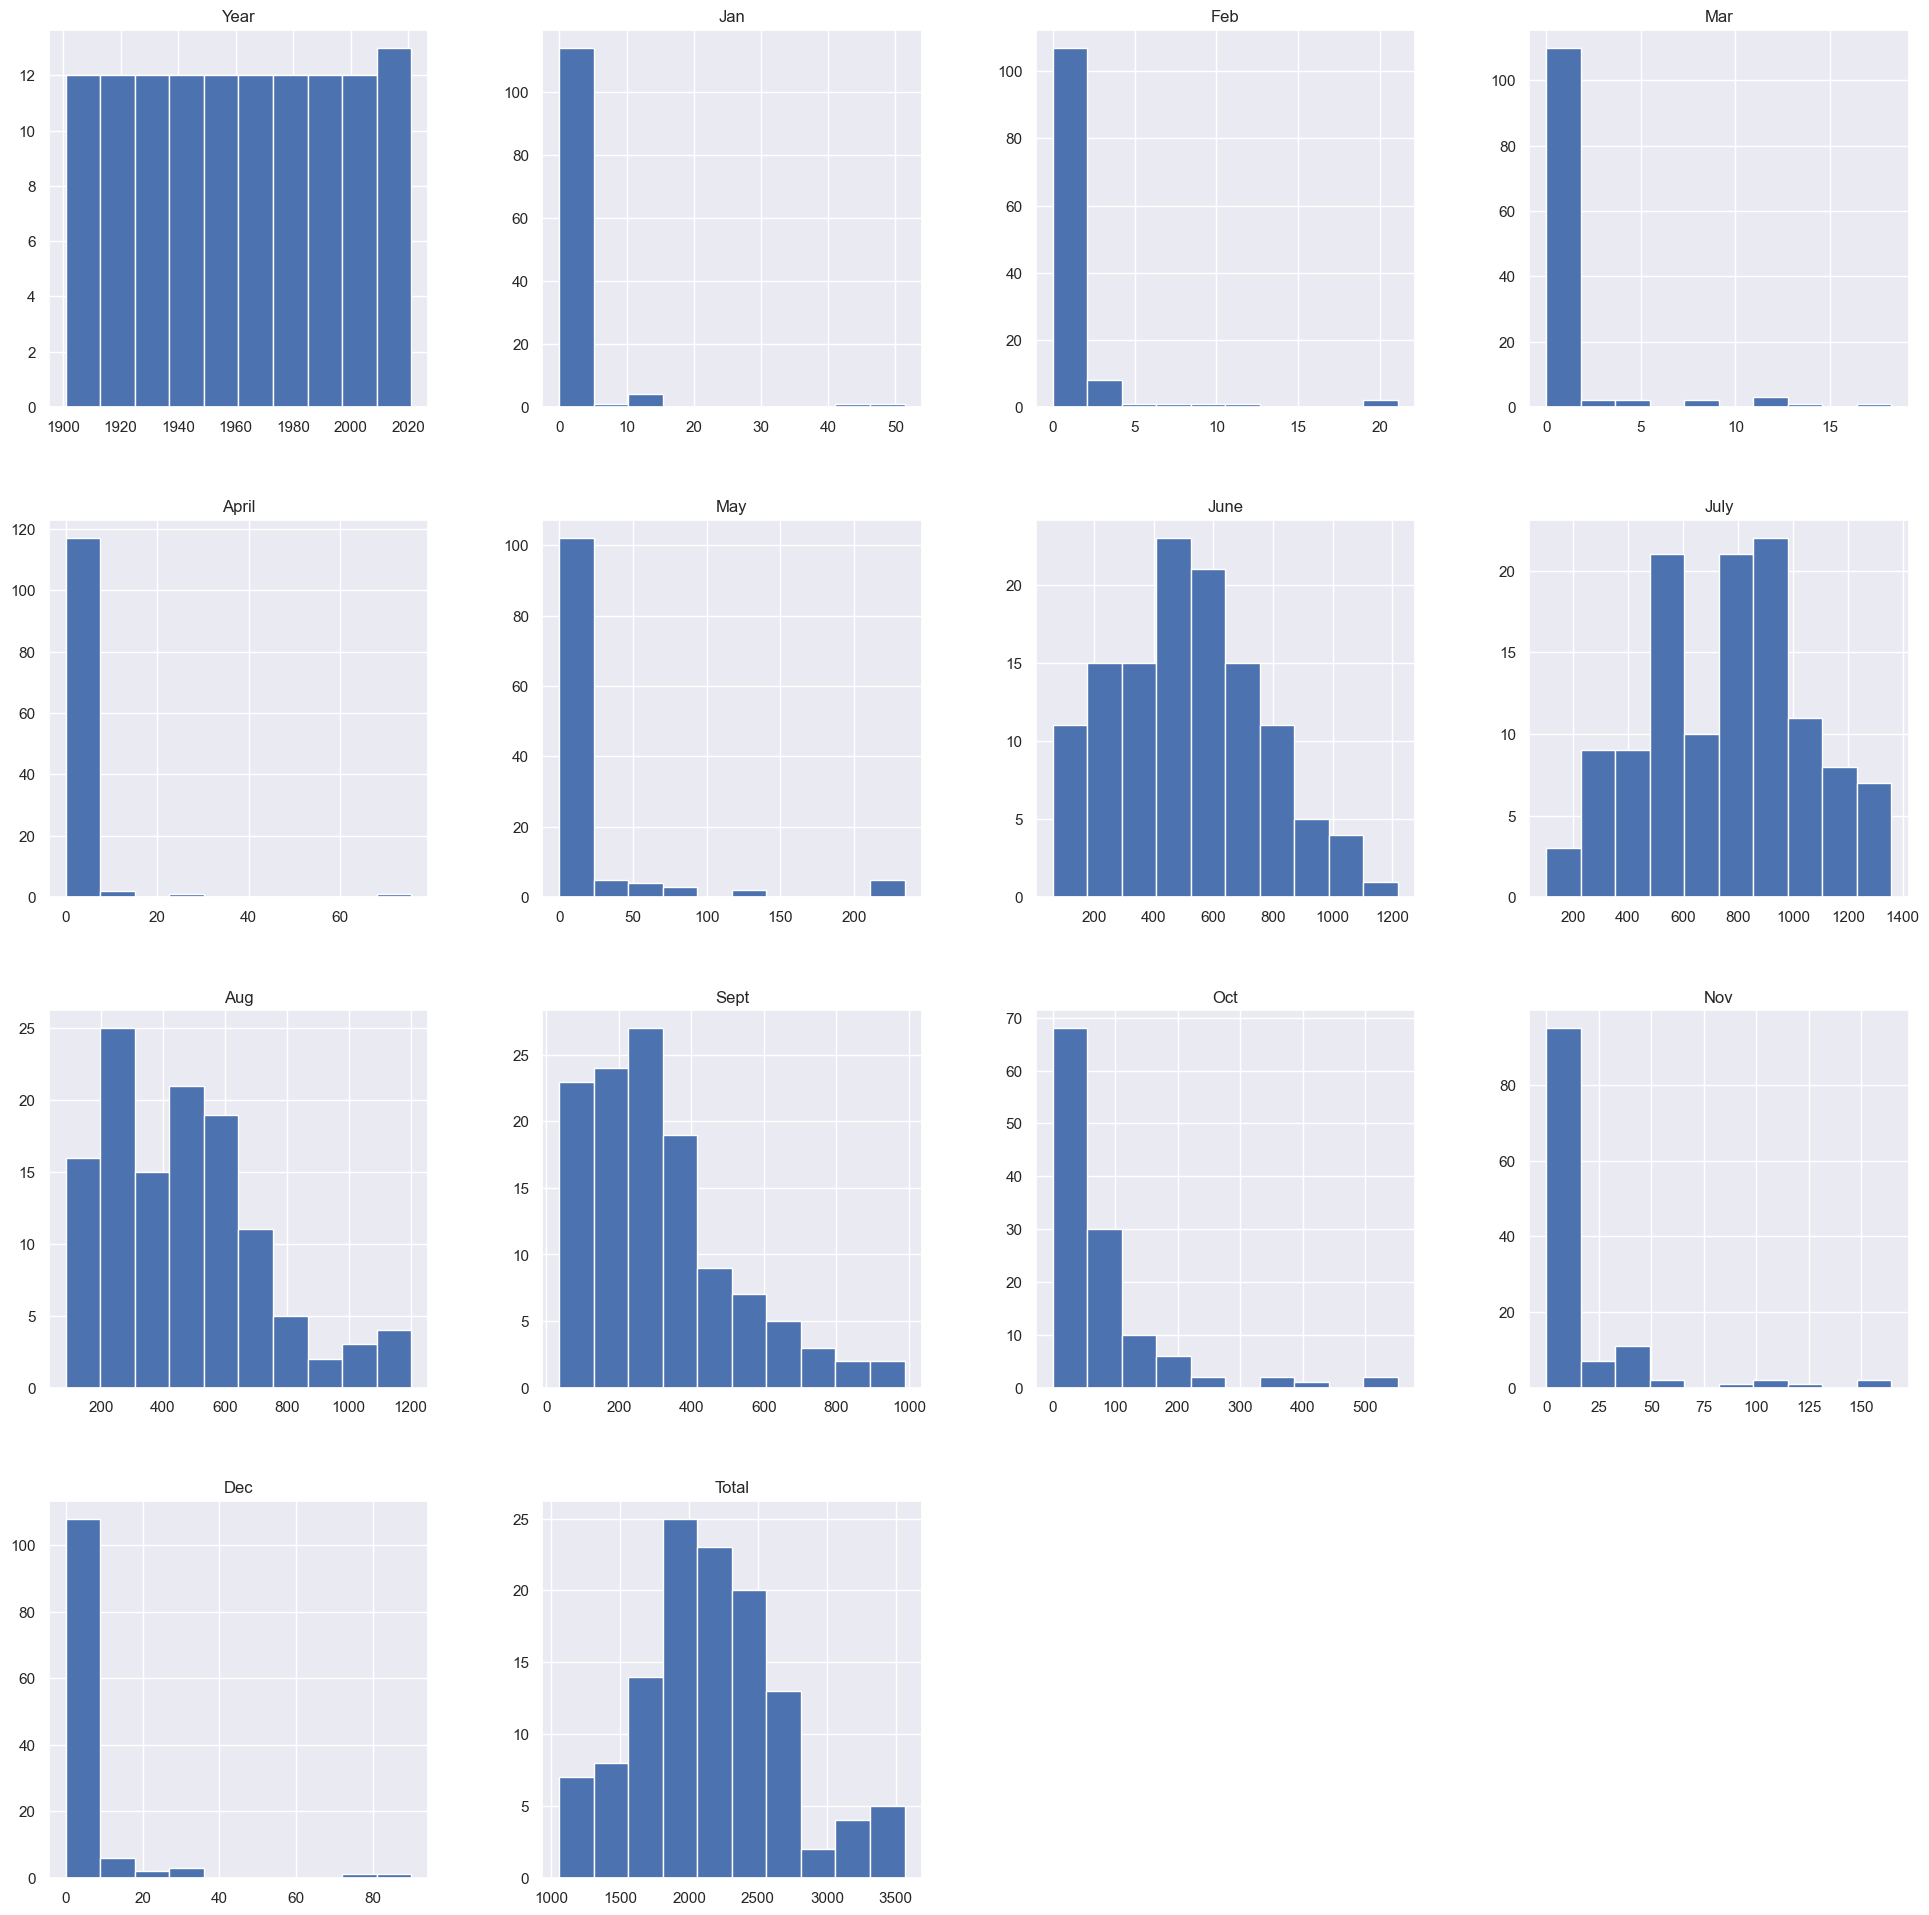

In [528]:
rain.hist(figsize=(24,24));

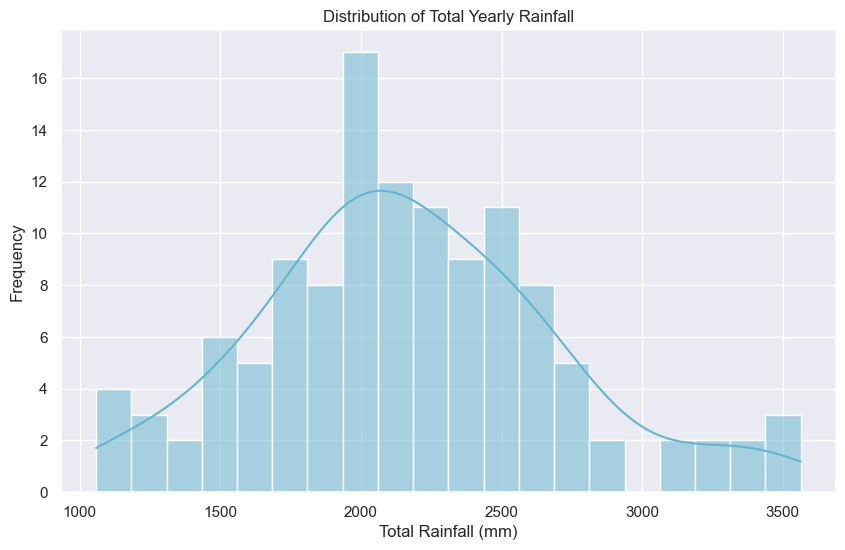

In [529]:
# Visualize the distribution of total yearly rainfall
plt.figure(figsize=(10, 6))
sns.histplot(rain['Total'], kde=True, bins=20, color='c')
plt.title('Distribution of Total Yearly Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Outliers Handling

- Visulize Outliers Through Box Plot

In [530]:
# Dropping 'Year' and 'Total' columns
rainfall_months = rain.drop(columns=['Year', 'Total'])

# Melt the DataFrame to convert months into a single column for Plotly
rainfall_melted = rainfall_months.melt(var_name='Month', value_name='Rainfall')

# Create the boxplot using Plotly
fig = px.box(rainfall_melted, x='Month', y='Rainfall', title='Distribution of Monthly Rainfall (1901-2021)')

# Show the plot
fig.show()

In [531]:
rainfall_melted

,Month,Rainfall
0,Jan,13.116602
1,Jan,0.000000
2,Jan,0.000000
3,Jan,0.000000
4,Jan,0.662561
...,...,...
1447,Dec,79.685446
1448,Dec,0.000000
1449,Dec,1.172425
1450,Dec,16.787305


<div style="background-color: black; padding: 25px; border-radius:50px 50px; width:94%;font-family: 'Cursive';color: #55;">

**This box plot graph visualizes the distribution of monthly rainfall from 1901 to 2021. Each box represents one month, showing how the rainfall data is spread out over time:**

- The box captures the interquartile range (IQR), representing the middle 50% of rainfall values for each month.

- The line inside the box marks the median rainfall for that month.

- Whiskers extend to show the range of values within 1.5 times the IQR.

- Any points outside the whiskers are outliers, indicating unusual or extreme rainfall for those months.

**This plot allows us to compare rainfall variability across different months, identify months with more consistent rainfall, and highlight months with more extreme outliers.**

**| 1. Removing Outliers**

In [532]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = rainfall_melted.groupby('Month')['Rainfall'].quantile(0.25)
Q3 = rainfall_melted.groupby('Month')['Rainfall'].quantile(0.75)

# Calculate IQR for each month
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers based on month-specific bounds
def remove_outliers(row):
    month = row['Month']
    if row['Rainfall'] < lower_bound[month] or row['Rainfall'] > upper_bound[month]:
        return False  # This row is an outlier
    return True  # This row is within bounds

# Filter out outliers
rainfall_filtered = rainfall_melted[rainfall_melted.apply(remove_outliers, axis=1)]

# Plot after removing outliers
fig = px.box(rainfall_filtered, x='Month', y='Rainfall', title='Monthly Rainfall Distribution (IQR Method)')
fig.show()

In [533]:
rainfall_filtered.tail(500)

,Month,Rainfall
887,Aug,108.668075
888,Aug,267.706955
889,Aug,87.493370
890,Aug,467.132990
891,Aug,610.897486
...,...,...
1442,Dec,0.000000
1443,Dec,0.260685
1445,Dec,0.000000
1446,Dec,0.000000


<div style="background-color: white; padding: 25px; border-radius:50px 50px; width:94%;font-family: 'Cursive';color: #356;">

# 1. Removing Outliers Using IQR (Interquartile Range) Method:
- Outliers are typically defined as values falling outside 1.5 times the IQR above Q3 or below Q1.

- In this case, for each month, rainfall data points that fall below the lower bound or above the upper bound are considered outliers and removed.

- The new boxplot will have no outliers, and the range of whiskers (the lines extending from the box) will be shorter, reflecting the more typical rainfall patterns.

- The data will look more condensed, and extreme high or low rainfall values will no longer be visible.
Interpretation is Removing outliers simplifies the data by focusing on the core range of rainfall for each month, making it easier to spot patterns in typical monthly rainfall.

**| 2. Capping Ouutliers**

In [534]:
# Cap outliers using IQR method
def cap_outliers(row):
    month = row['Month']
    if row['Rainfall'] < lower_bound[month]:
        return lower_bound[month]  # Cap to the lower bound
    elif row['Rainfall'] > upper_bound[month]:
        return upper_bound[month]  # Cap to the upper bound
    else:
        return row['Rainfall']  # Keep the original value

# Apply capping
rainfall_melted['Capped_Rainfall'] = rainfall_melted.apply(cap_outliers, axis=1)

# Plot after capping outliers
fig = px.box(rainfall_melted, x='Month', y='Capped_Rainfall', title='Monthly Rainfall Distribution (Capped Outliers)')
fig.show()

In [535]:
rainfall_melted

,Month,Rainfall,Capped_Rainfall
0,Jan,13.116602,0.000000
1,Jan,0.000000,0.000000
2,Jan,0.000000,0.000000
3,Jan,0.000000,0.000000
4,Jan,0.662561,0.000000
...,...,...,...
1447,Dec,79.685446,0.440373
1448,Dec,0.000000,0.000000
1449,Dec,1.172425,0.440373
1450,Dec,16.787305,0.440373


<div style="background-color: yellow; padding: 25px; border-radius:50px 50px; width:94%;font-family: 'Cursive';color: #555;">

# 2. Capping Outliers:-

- Instead of removing outliers, this method caps them. Values beyond the upper or lower bounds (as determined by the IQR) are set to the respective bounds. This preserves all data points but restricts extreme values.

- The whiskers will extend only up to the capped values, giving a smoother representation of the data.

- Interpretation is Capping reduces the impact of extreme values while keeping the data intact. The boxplot will still display variation, but the risk of highly skewed results due to outliers is reduced.

In [536]:
from scipy import stats

# Calculate z-scores for each rainfall value (grouped by month)
rainfall_melted['Z_Score'] = rainfall_melted.groupby('Month')['Rainfall'].transform(lambda x: stats.zscore(x, nan_policy='omit'))

# Filter out values where Z-Score is outside [-3, 3]
rainfall_filtered = rainfall_melted[(rainfall_melted['Z_Score'] >= -3) & (rainfall_melted['Z_Score'] <= 3)]

# Plot after removing outliers based on Z-Score
fig = px.box(rainfall_filtered, x='Month', y='Rainfall', title='Monthly Rainfall Distribution (Z-Score Filtered)')
fig.show()

In [537]:
rainfall_filtered

,Month,Rainfall,Capped_Rainfall,Z_Score
0,Jan,13.116602,0.000000,1.794637
1,Jan,0.000000,0.000000,-0.243530
2,Jan,0.000000,0.000000,-0.243530
3,Jan,0.000000,0.000000,-0.243530
4,Jan,0.662561,0.000000,-0.140576
...,...,...,...,...
1445,Dec,0.000000,0.000000,-0.289346
1446,Dec,0.000000,0.000000,-0.289346
1448,Dec,0.000000,0.000000,-0.289346
1449,Dec,1.172425,0.440373,-0.193959


# 3. Z-Score or Standard Deviation Method:-

- A z-score represents how far a data point is from the mean in terms of standard deviations.
- Any value with a z-score beyond ±3 is considered an outlier
- Outliers are removed based on their z-score, which helps ensure that extreme deviations from the mean are excluded.
- The boxplot will show a more normalized distribution, with no extreme values or outliers.
- Interpretation is the The z-score method removes points far from the mean, which could be useful if the data follows a normal distribution.


<div style="background-color: red; padding: 25px; border-radius:50px 50px; width:94%;font-family: 'Cursive';color: #;">

# *Summary of Handling Outliers:-*

- Removing outliers using IQR: This method strictly eliminates outliers, focusing on typical rainfall distributions, but at the cost of potentially discarding important extreme values.

- Capping outliers: This retains all data but limits the effect of extreme values, ensuring that outliers don’t skew the results too much while preserving the dataset's completeness.

- Z-score filtering: This technique filters extreme values based on statistical deviation, which is useful when the data follows a normal distribution, and you want to limit the impact of extreme rainfall events.

# **Total Seasonal Rainfall In Mumbai

In [546]:
# Define seasons by grouping months
rain['Winter'] = rain[['Dec', 'Jan', 'Feb']].sum(axis=1)
rain['Summer'] = rain[['Mar', 'April', 'May']].sum(axis=1)
rain['Monsoon'] = rain[['June', 'July', 'Aug', 'Sept']].sum(axis=1)
rain['Post-Monsoon'] = rain[['Oct', 'Nov']].sum(axis=1)

# Compute the total rainfall per season
seasonal_total = rain[['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']].sum()

# Prepare the data for Plotly
seasonal_total_df = pd.DataFrame({
    'Season': ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'],
    'Total Rainfall (mm)': seasonal_total.values
})

# Create the bar chart using Plotly with auto text to display scores on bars
fig = px.bar(seasonal_total_df, 
             x='Season', 
             y='Total Rainfall (mm)', 
             color='Season',
             text='Total Rainfall (mm)',   # Display the scores on top of the bars
             color_discrete_sequence=['skyblue', 'lightcoral', 'lightgreen', 'orange'],
             title='Total Seasonal Rainfall in Mumbai')

# Update layout for readability
fig.update_layout(
    xaxis_title='Season',
    yaxis_title='Total Rainfall (mm)',
    title_x=0.5,
    template='plotly_white'
)

# Display the text clearly on top of the bars
fig.update_traces(textposition='outside')

# Display the Plotly figure
fig.show()

**| Summary:-**
- Monsoon season has the highest total rainfall, which is typical for Mumbai due to its tropical climate.
- Winter and Summer seasons have significantly lower rainfall, indicating dry periods.
- Post-Monsoon shows moderate rainfall, mainly reflecting residual rain after the monsoon. 

In [541]:
rain

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Winter,Summer,Monsoon,Post-Monsoon
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,13.116602,21.089460,2138.401038,9.871696
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,19.526547,0.355001,1911.941830,29.142956
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,0.000000,221.412775,2140.307588,157.892877
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,0.000000,11.381769,1391.255450,38.679948
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,2.376012,0.000000,1045.378739,32.269499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642,79.685446,1.043890,2624.263171,102.108135
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599,0.000000,0.000000,2067.852812,22.293786
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801,1.172425,0.000000,3182.861434,149.022942
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531,16.787305,0.104274,3361.909567,184.458385


# Classification of Yearly Rainfall Data

In [418]:
# Calculate median
median_rainfall = np.median(rain['Total'])
mad_rainfall = np.median(np.abs(rain['Total'] - median_rainfall))

# Define thresholds using MAD
threshold_low = median_rainfall - 3 * mad_rainfall
threshold_high = median_rainfall + 3 * mad_rainfall

# Classify each year based on MAD
def classify_rainfall(rainfall):
    if rainfall < threshold_low:
        return 'Below Normal'
    elif rainfall > threshold_high:
        return 'Abnormal'
    else:
        return 'Normal'

# Add classification column to DataFrame
rain['Classification'] = rain['Total'].apply(classify_rainfall)

rain

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Classification
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,Normal
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,Normal
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,Normal
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,Normal
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,Below Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642,Normal
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599,Normal
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801,Abnormal
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531,Abnormal


In [419]:
# Plot the bar chart using Plotly Express
fig = px.bar(rain, 
             x='Year', 
             y='Total', 
             color='Classification',
             color_discrete_map={'Below Normal': 'blue', 'Normal': 'green', 'Abnormal': 'red'},
             labels={'Total': 'Total Rainfall', 'Year': 'Year', 'Classification_MAD': 'Classification'},
             title='Yearly Rainfall with Classification')

# Show the figure
fig.show()

In [420]:
# Count the number of years in each classification
classification_counts = rain['Classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Count']

# Create a bar chart
fig = px.bar(classification_counts, 
             x='Classification', 
             y='Count',
             title='Number of Years by Rainfall Classification',
             color='Classification',
             color_discrete_map={
                 'Normal': 'green',
                 'Below Normal': 'blue',
                 'Abnormal': 'red'
             })

fig.show()

# | Distribution of Rainfall Categories

In [421]:
# First Of all Define a function to categorize total rainfall based on the specified ranges
def categorize_rainfall(Total):
    if Total < 500:
        return 'Very Low'
    elif 500 <= Total < 1000:
        return 'Low'
    elif 1000 <= Total < 1800:
        return 'Medium'
    elif 1800 <= Total < 2100:
        return 'High'
    elif 2100 <= Total < 2500:
        return 'Very High'
    else:  Total >= 2500
    return 'Extreme'

# Apply the function to create a new "Category" column
rain['Category'] = rain['Total'].apply(categorize_rainfall)

# Display the updated DataFrame with the new "Category" column
rain.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Classification,Category
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,Normal,Very High
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,Normal,High
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,Normal,Extreme
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,Normal,Medium
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,Below Normal,Medium


In [422]:
# Create a pie chart for the distribution of rainfall categories
fig = px.pie(rain, names='Category', title='Distribution of Rainfall Categories',
             hole=0.3)  # Setting hole=0.3 to create a donut chart

# Show the plot
fig.show()

In [423]:
# Bar chart for the count of each category
category_counts = rain['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig_bar = px.bar(category_counts, x='Category', y='Count', title='Count of Rainfall Categories')
fig_bar.show()

In [424]:
# Box plot for total rainfall by category
fig_box = px.box(rain, x='Category', y='Total', title='Total Rainfall by Category',
                 labels={'Total': 'Total Rainfall (mm)'})
fig_box.show()

# Joint Distribution of Rainfall Category

In [425]:
# Create a DataFrame with Category, and Classification
classified_data = rain[['Category','Classification']]
classified_data

,Category,Classification
0,Very High,Normal
1,High,Normal
2,Extreme,Normal
3,Medium,Normal
4,Medium,Below Normal
...,...,...
116,Extreme,Normal
117,High,Normal
118,Extreme,Abnormal
119,Extreme,Abnormal


In [426]:
# Create the grouped bar plot using Plotly
fig = px.histogram(
    classified_data,
    x='Category',
    color='Classification',
    barmode='group',
    title='Joint Distribution bar plot: (Category vs Classification)',
    labels={'Category': 'Category', 'count': 'Count'},
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    xaxis_tickangle=-0,
    legend_title_text='Classification'
)

# Show the plot
fig.show()

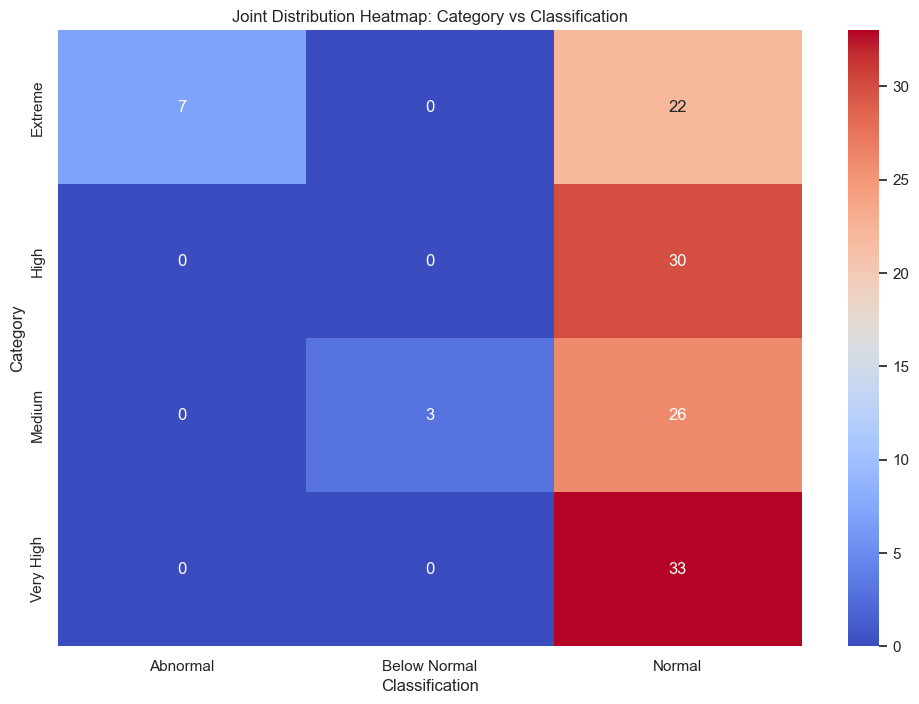

In [427]:
# Create a cross-tabulation (pivot table) of Category and Classification counts
cross_tab = pd.crosstab(classified_data['Category'], classified_data['Classification'])

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap to show the joint distribution
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')

# Add plot title and labels
plt.title('Joint Distribution Heatmap: Category vs Classification')
plt.xlabel('Classification')
plt.ylabel('Category')

# Show the plot
plt.show()

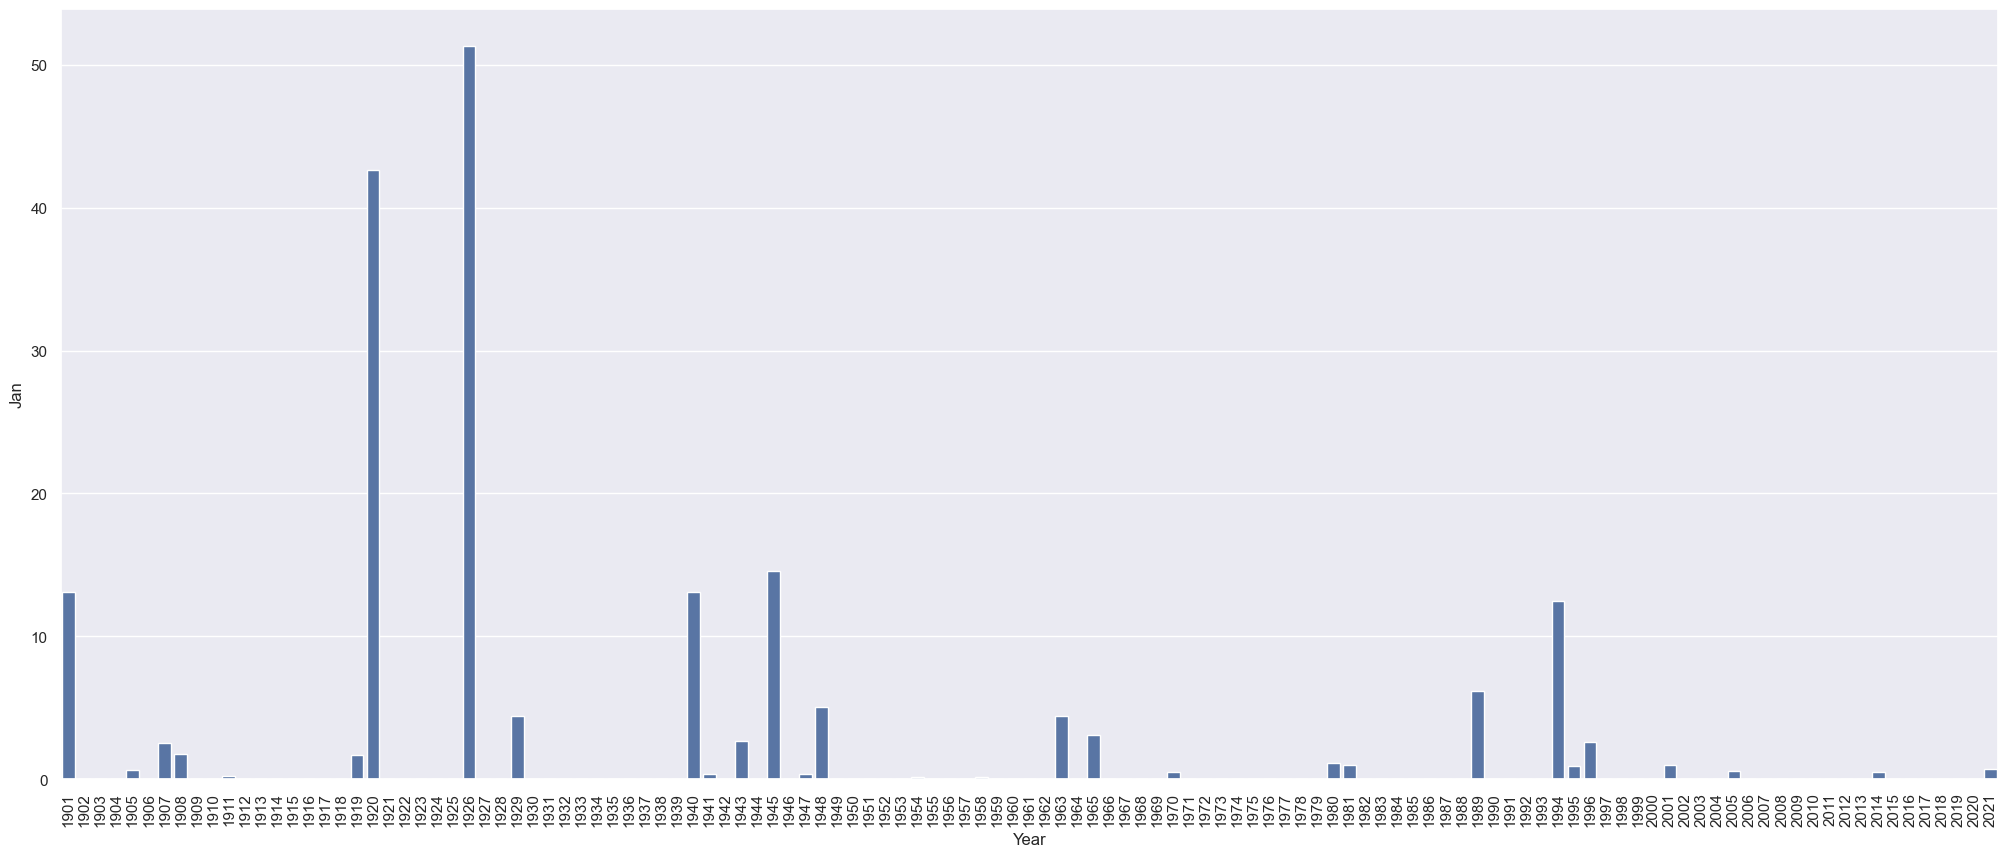

In [428]:
plt.figure(figsize=(25,10))
sns.barplot(data=rain,x="Year",y="Jan")
plt.xticks(rotation=90)
plt.show()

In [429]:
rain

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Classification,Category
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,Normal,Very High
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,Normal,High
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,Normal,Extreme
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,Normal,Medium
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,Below Normal,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642,Normal,Extreme
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599,Normal,High
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801,Abnormal,Extreme
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531,Abnormal,Extreme


# **Mapping for Classification & Category Colunm**

**| Classification Colunm**

In [430]:
classification_mapping = {
    'Below Normal': 0,
    'Normal': 1,
    'Abnormal': 2
}

# Apply the mapping
rain['Classification'] = rain['Classification'].map(classification_mapping)

**| Category Column**

In [431]:
category_mapping = {
    'Medium': 0,
    'High': 1,
    'Very High': 2,
    'Extreme': 3
}

# Apply the mapping
rain['Category'] = rain['Category'].map(category_mapping)
rain

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,Classification,Category
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796,1,2
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334,1,1
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240,1,3
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168,1,0
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642,1,3
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599,1,1
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801,2,3
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531,2,3


# | Data Spitting

In [432]:
from sklearn.model_selection import train_test_split

# Define features (monthly rainfall data) and target (total rainfall)
X = rain[['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']]
y = rain['Total']

In [433]:
X

,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547
2,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000
3,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000
4,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446
117,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000
118,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425
119,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305


In [434]:
y

0      2182.478796
1      1960.966334
2      2519.613240
3      1441.317168
4      1080.024250
          ...     
116    2807.100642
117    2090.146599
118    3333.056801
119    3563.259531
120    3073.784373
Name: Total, Length: 121, dtype: float64

# | Feature Scalling

In [435]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [436]:
X_train

,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec
12,0.0,0.349498,0.000000,0.000000,0.000000,844.572166,875.485780,175.587500,169.949668,78.292189,0.000000,0.000000
15,0.0,0.000000,0.000000,0.194165,3.435732,446.165305,681.550228,628.136391,326.122815,158.769452,8.487650,0.000000
115,0.0,0.000000,4.842942,0.000000,1.714245,580.586157,830.176192,544.153703,731.296840,82.128280,0.000000,0.000000
76,0.0,0.000000,0.000000,0.456894,0.000000,430.920239,1113.549222,231.219509,493.282130,30.456543,45.868590,0.000000
98,0.0,0.152298,0.000000,0.000000,81.579496,534.149959,474.612199,176.379005,360.986850,125.519178,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.000000,0.000000,0.000000,214.505391,611.990800,805.596706,669.478493,500.846350,0.546032,0.000000,0.000000
14,0.0,12.032996,18.252996,0.205113,1.966961,960.048126,374.420618,219.701827,288.503275,91.792322,0.103866,0.000000
92,0.0,0.000000,0.000000,0.000000,3.807452,432.953157,736.430888,302.488992,849.163549,94.876048,8.071798,0.147702
51,0.0,0.000000,0.000000,0.000000,0.000000,659.490922,816.151386,182.467970,81.010689,59.808950,0.000000,0.000000


In [437]:
X_train.shape

(96, 12)

In [438]:
X_test.head()

,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec
44,14.570448,0.000000,0.000000,0.0,0.000000,584.616216,729.452229,610.897486,246.451727,4.631403,1.925177,0.00000
47,5.046216,0.000000,0.000000,0.0,0.000000,258.692052,799.328443,437.881137,310.927140,16.782591,164.348387,0.00000
4,0.662561,1.713452,0.000000,0.0,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.00000
55,0.000000,0.000000,0.000000,0.0,61.833412,706.199643,854.202189,506.769302,550.974669,102.079815,10.155548,0.00000
26,0.000000,1.850567,0.155332,0.0,0.000000,842.896874,543.916347,233.621683,168.597636,166.681794,42.033354,1.02853


In [439]:
X_test.shape

(25, 12)

In [440]:
y_train

12     2144.236801
15     2252.861738
115    2774.898359
76     2345.753127
98     1753.378985
          ...     
106    2802.963772
14     1967.028100
92     2427.939586
51     1798.929916
102    2126.054987
Name: Total, Length: 96, dtype: float64

In [441]:
y_train.shape

(96,)

In [442]:
y_test.head()

44    2192.544686
47    1993.005966
4     1080.024250
55    2792.214576
26    2000.782117
Name: Total, dtype: float64

In [443]:
y_test.shape

(25,)

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:center;width: 100%">Conclusion Summary
    
<h2 align="left"><font color=red></font></h2>

| **Data Subset** | **Description**              | **Size**     |
|-----------------|------------------------------|--------------|
| `X_train`       | Features used for training    | 80% of X     |
| `y_train`       | Labels used for training      | 80% of y     |
| `X_test`        | Features used for testing     | 20% of X     |
| `y_test`        | Labels used for testing       | 20% of y     |

In [444]:
rain.dtypes

Year                int64
Jan               float64
Feb               float64
Mar               float64
April             float64
May               float64
June              float64
July              float64
Aug               float64
Sept              float64
Oct               float64
Nov               float64
Dec               float64
Total             float64
Classification      int64
Category            int64
dtype: object

# **<p style="background-color:red; font-family:Book Antiqua; color:white; font-size:120%; text-align:center; border-radius:1000px 1000px;"> | Machine Learning Models |</p>**

# **1.|Decision Tree Regressor**

In [445]:
# Initialize the Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)

In [446]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10]    # minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
dtree_model = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', 
                           verbose=1)

In [447]:
# Train the model
dtree_model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error', verbose=1)

In [448]:
# Make predictions on the test set
dtree_pred = dtree_model.predict(X_test)

In [449]:
# Calculate the Mean Absolute Error and R² Score for Decision Tree Regressor
mae_dtree = mean_absolute_error(y_test, dtree_pred)
r2_dtree = r2_score(y_test, dtree_pred)


# Display the MAE and R² Score for Decision Tree Regressor
print(f"{'Model':<25} {'MAE':<20} {'R² Score':<20}")
print('-' * 60)
print(f"{'Decision Tree Regressor':<25} {mae_dtree:<20} {r2_dtree:<20.4f}")
print('-' * 60)

Model                     MAE                  R² Score            
------------------------------------------------------------
Decision Tree Regressor   351.83042433317956   0.3828              
------------------------------------------------------------


In [493]:
import plotly.express as px
import pandas as pd

# Create a DataFrame to hold the MAE and R² Score
model_performance = pd.DataFrame({
    'Metric': ['MAE', 'R² Score'],
    'Score': [mae_dtree, r2_dtree]
})

# Create a wide bar chart using Plotly Express
fig = px.bar(model_performance, 
             x='Metric', 
             y='Score', 
             title='Decision Treee Regressor Performance',
             labels={'Score': 'Score'},
             color='Metric',
             color_discrete_map={'MAE': 'green', 'R² Score': 'red'},
             text='Score')

# Customize the layout for better visibility
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(width=1024, height=600, xaxis_title='', yaxis_title='')

# Show the figure
fig.show()

**| Summary**
- The Decision Tree Regressor model for rainfall prediction in Mumbai has a Mean Absolute Error (MAE) of 351.83, indicating that the model's average prediction error is around 351 mm. 
- The R² score of 0.3828 suggests that the model explains about 38% of the variance in the rainfall data.
- Showing moderate predictive performance.

# **2.|Random Forest Regressor**

In [450]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [451]:
# Make predictions
rf_pred = rf_model.predict(X_test)

In [452]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

# Display the MAE and R² Score for Random Forest Regressor
print(f"{'Model':<25} {'MAE':<20} {'R² Score':<20}")
print('-' * 60)
print(f"{'Random Forest Regressor':<25} {mae_rf:<20} {r2_rf:<20.4f}")
print('-' * 60)

Model                     MAE                  R² Score            
------------------------------------------------------------
Random Forest Regressor   218.21599454919968   0.7235              
------------------------------------------------------------


In [499]:
# Create a DataFrame to hold the MAE and R² Score
model_performance = pd.DataFrame({
    'Metric': ['MAE', 'R² Score'],
    'Score': [mae_rf, r2_rf]
})

# Create a wide bar chart using Plotly Express
fig = px.bar(model_performance, 
             x='Metric', 
             y='Score', 
             title='Random Forest Regressor Performance',
             labels={'Score': 'Score'},
             color='Metric',
             color_discrete_map={'MAE': 'red', 'R² Score': 'black'},
             text='Score')

# Customize the layout for better visibility
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(width=1024, height=600, xaxis_title='', yaxis_title='')

# Show the figure
fig.show()

**| Summary**
- The Random Forest Regressor model for rainfall prediction resulted in a mean absolute error (MAE) of 218.22, indicating the average deviation of predictions from actual values. 
- The R² score of 0.7235 suggests that the model explains about 72.35% of the variance in the rainfall data.
- Reflecting a moderately strong predictive performance.

# **3.|Gradiant Boost Regressor**

In [453]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [454]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
gbr_model = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utilize all available cores
    scoring='r2',  # Optimize for R² score
    verbose=2
)

In [455]:
# Fit the grid search to the training data
gbr_model.fit(X_train, y_train)

# Best parameters
gbr_model.best_params_

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300,
 'subsample': 0.8}

In [456]:
# Make predictions on the test data
gbr_pred = gbr_model.predict(X_test)

In [457]:
# Evaluate the model
mae_gbr = mean_absolute_error(y_test, gbr_pred)
r2_gbr = r2_score(y_test,gbr_pred)

In [458]:
# Display the MAE and R² Score for Gradiant Boosting Regressor
print(f"{'Model':<30} {'MAE':<16} {'R² Score':<20}")
print('-' * 60)
print(f"{'Gradiant Boosting Regressor':<25} {mae_gbr:<20} {r2_gbr:<20.4f}")
print('-' * 60)

Model                          MAE              R² Score            
------------------------------------------------------------
Gradiant Boosting Regressor 134.80905383489318   0.8858              
------------------------------------------------------------


In [500]:
# Create a DataFrame to hold the MAE and R² Score
model_performance = pd.DataFrame({
    'Metric': ['MAE', 'R² Score'],
    'Score': [mae_gbr, r2_gbr]
})

# Create a wide bar chart using Plotly Express
fig = px.bar(model_performance, 
             x='Metric', 
             y='Score', 
             title='Gradiant Boosting Regressor Performance',
             labels={'Score': 'Score'},
             color='Metric',
             color_discrete_map={'MAE': 'sky blue', 'R² Score': 'green'},
             text='Score')

# Customize the layout for better visibility
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(width=1024, height=600, xaxis_title='', yaxis_title='')

# Show the figure
fig.show()

**| Summary :-**
- The Gradient Boosting Regressor model for rainfall prediction in Mumbai demonstrates strong performance with a Mean Absolute Error (MAE) of 134.81. Indicating the average deviation between the predicted and actual rainfall.
- The R² score of 0.8858 suggests that the model explains approximately 89% of the variance in the rainfall data.
- Showcasing its reliability in predicting rainfall patterns.

# **4.|XG BOOST REGRESION**

In [471]:
# Define and train the XGBoost model
xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [474]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 6, 10], 
    'subsample': [0.7, 0.8, 1.0], 
    'colsample_bytree': [0.7, 0.8, 1.0], 
    'gamma': [0, 0.1, 0.2]
}

xgb_model = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                   n_iter=100, cv=5, scoring='neg_mean_absolute_error',
                                   verbose=1, random_state=42, n_jobs=-1, refit=True)

#Fit the Model
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [478]:
# Make predictions on the test data
xgb_pred = xgb_model.predict(X_test)

In [479]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)

In [485]:
# Display the MAE and R² Score for Gradiant Boosting Regressor
print(f"{'Model':<30} {'MAE':<16} {'R² Score':<20}")
print('-' * 60)
print(f"{'XG Boost Regressor':<25} {mae_xgb:<20} {r2_xgb:<20.4f}")
print('-' * 60)

Model                          MAE              R² Score            
------------------------------------------------------------
XG Boost Regressor        150.75690262375      0.8707              
------------------------------------------------------------


In [515]:
# Create a DataFrame to hold the MAE and R² Score
model_performance = pd.DataFrame({
    'Metric': ['MAE', 'R² Score'],
    'Score': [mae_xgb, r2_xgb]
})

# Create a wide bar chart using Plotly Express
fig = px.bar(model_performance, 
             x='Metric', 
             y='Score', 
             title='XG Boost Regression Performance',
             labels={'Score': 'Score'},
             color='Metric',
             color_discrete_map={'MAE': 'orange', 'R² Score': 'blue'},
             text='Score')

# Customize the layout for better visibility
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(width=1024, height=600, xaxis_title='', yaxis_title='')

# Show the figure
fig.show()

# **| Summary :_**
- The XGBoost Regressor model for Mumbai rainfall prediction has an MAE (Mean Absolute Error) of approximately 150.76 and an R² score of 0.8707. 
- This indicates that the model has good predictive performance, with the R² score suggesting that about 87.07% of the variance in the rainfall data is explained by the model. 
- The MAE indicates that the average absolute error in rainfall predictions is around 150.76 mm. 
- The model performs well in capturing the patterns of rainfall data.

# | **Display the MAE and R² Score for All Model**

<table style="border: 2px solid #ccc; border-radius: 10px; width: 100%; background-color: #87CEEB; padding: 10px; box-shadow: 1px 1px 10px rgba(0, 0, 0, 0.1);">
  <thead style="background-color: #00BFFF; color: blue; text-align: center; font-weight: bold;">
    <tr>
      <th style="padding: 10px; text-align: center; border-right: 1px solid #ddd;">Model</th>
      <th style="padding: 10px; text-align: center; border-right: 1px solid #ddd;">MAE</th>
      <th style="padding: 10px;text-align: center;border-right: 1px solid #ddd;">R² Score</th>
    </tr>
  </thead>
  <tbody>
    <tr style="border-bottom: 1px solid #ddd;">
      <td style="padding: 10px; text-align: center; color: #000000;">Decision Tree Regressor</td>
      <td style="padding: 10px; text-align: center; color: #000000;">351.8304</td>
      <td style="padding: 10px; text-align: center; color: #000000;">0.3828</td>
    </tr>
    <tr style="border-bottom: 1px solid #ddd;">
      <td style="padding: 10px; text-align: center; color: #000000;">Random Forest Regressor</td>
      <td style="padding: 10px; text-align: center; color: #000000;">218.2160</td>
      <td style="padding: 10px; text-align: center; color: #000000;">0.7235</td>
    </tr>
    <tr style="border-bottom: 1px solid #ddd;">
      <td style="padding: 10px; text-align: center; color: #000000;">Gradient Boosting Regressor</td>
      <td style="padding: 10px; text-align: center; color: #000000;">134.8091</td>
      <td style="padding: 10px; text-align: center; color: #000000;">0.8858</td>
    </tr>
    <tr>
      <td style="padding: 10px; text-align: center; color: #000000;">XG Boost Regressor</td>
      <td style="padding: 10px; text-align: center; color: #000000;">150.7570</td>
      <td style="padding: 10px; text-align: center; color: #000000;">0.8707</td>
    </tr>
  </tbody>
</table>

# **| Visulize The All Model Comparision**

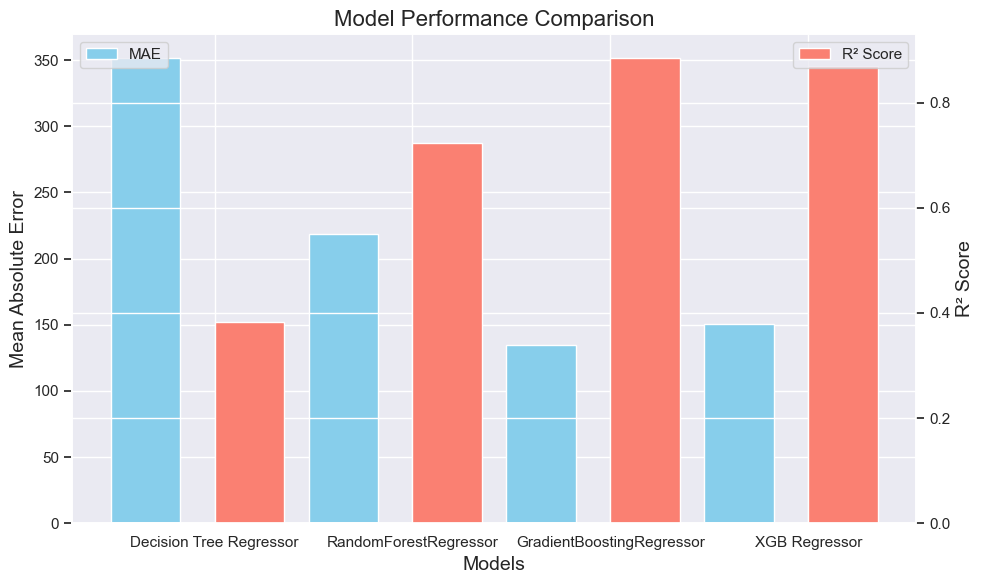

In [547]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and metrics
models = ['Decision Tree Regressor','RandomForestRegressor','GradientBoostingRegressor','XGB Regressor']
mae_scores = [mae_dtree, mae_rf,mae_gbr,mae_xgb]
r2_scores = [r2_dtree,r2_rf,r2_gbr,r2_xgb]

# Set the positions and width for the bars
bar_width = 0.35
x = np.arange(len(models))

# Create a bar plot for MAE
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create MAE bars
bars_mae = ax1.bar(x - bar_width, mae_scores, bar_width, label='MAE', color='skyblue')

# Create a second y-axis for R² scores
ax2 = ax1.twinx()
bars_r2 = ax2.bar(x + bar_width/2, r2_scores, bar_width, label='R² Score', color='salmon')

# Adding labels and titles
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Mean Absolute Error', fontsize=14)
ax2.set_ylabel('R² Score', fontsize=14)
ax1.set_title('Model Performance Comparison', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: blue; font-size:115%; text-align:left; width: 100%;color:white">

# | **Comparison the MAE and R² Score for All Model**

<h2 align="center"><font color="yellow" style="font-family:Georgia;">• | Mean Absolute Error (MAE)| •</font></h2>

- **Lower MAE indicates better accuracy in predicting rainfall. Comparing MAE across models:**
- **One model likely has the lowest MAE, meaning it outperforms the others in terms of minimizing prediction errors.**
- **Decision Tree and RandomForest may have relatively higher MAEs compared to Gradient Boosting and XGBClassifier, which tend to perform better in complex datasets.**

<h2 align="center"><font color="yellow" style="font-family:Georgia;">• | R² Score| •</font></h2>

- **Higher R² values represent a model’s ability to explain the variance in the data. A model with an R² closer to 1 is preferable.**
- **One model (likely Gradient Boosting or XGBClassifier) has the highest R², indicating better predictive power and a better fit to the data.**
- **Decision Tree and RandomForest may show lower R² values compared to more sophisticated models like Gradient Boosting and XGBClassifier.**

<div style="border-radius:10px; padding: 15px; background-color: white; font-size:115%; text-align:left; width: 100%;color:Red">
<h2 align="center"><font color="black" style="font-family:Georgia;">• | Model Comparision's Result| •</font></h2>

- ***Gradient Boosting Regressor and XGB Regressor likely show superior performance with lower MAE and higher R² scores, indicating they are more accurate and explain more variance in the rainfall predictions.***

- ***Decision Tree Regressor and RandomForestRegressor may have higher errors (MAE) and lower R² scores, suggesting they are less suited for this task compared to the boosting methods.***